In [45]:
#Importing required libraries
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline 

In [52]:
#Reading training and testing data as dataframes
# train_df = pd.read_csv("train.csv")
train_df = pd.read_csv('account1.csv'
                      )
train_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,cus1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,cus2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,cus3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,cus4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,cus5,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


# Data Profiling

In [53]:
#Dimensions of dataset
train_df.shape

(4521, 18)

In [54]:
#Information about the data types of features
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         4521 non-null   object
 1   age        4521 non-null   int64 
 2   job        4521 non-null   object
 3   marital    4521 non-null   object
 4   education  4521 non-null   object
 5   default    4521 non-null   object
 6   balance    4521 non-null   int64 
 7   housing    4521 non-null   object
 8   loan       4521 non-null   object
 9   contact    4521 non-null   object
 10  day        4521 non-null   int64 
 11  month      4521 non-null   object
 12  duration   4521 non-null   int64 
 13  campaign   4521 non-null   int64 
 14  pdays      4521 non-null   int64 
 15  previous   4521 non-null   int64 
 16  poutcome   4521 non-null   object
 17  y          4521 non-null   object
dtypes: int64(7), object(11)
memory usage: 635.9+ KB


In [55]:
#Statistical summary of training dataset
train_df.describe(include ='all')

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,4521,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,cus1,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,1,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,NaN,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,NaN,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,NaN,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,NaN,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,NaN,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,NaN,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [56]:
#Checking if there are any missing values
train_df.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Analysis

Text(0.5, 1.0, 'Education type vs Count')

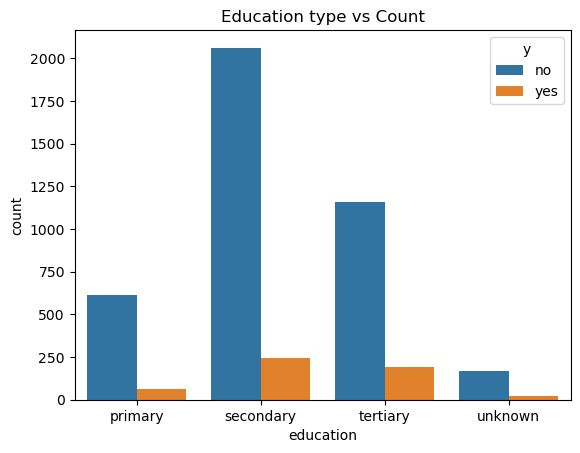

In [57]:
sns.countplot(x="education",data=train_df, hue = "y")
plt.title("Education type vs Count")

Text(0.5, 1.0, 'Martial Status vs Count')

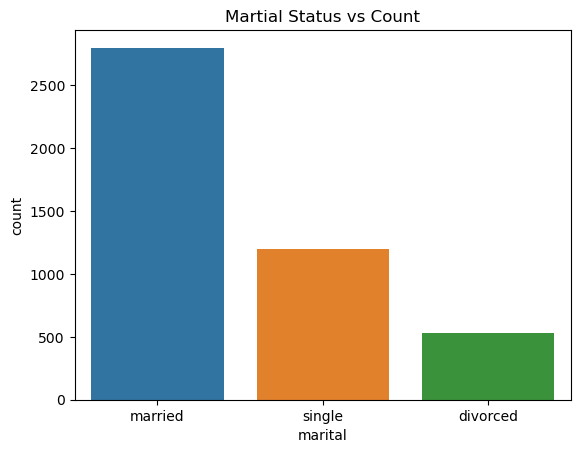

In [58]:
sns.countplot(x="marital", data = train_df)
plt.title("Martial Status vs Count")

* It seems like more number of married people invested in Term deposits

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'unemployed'),
  Text(1, 0, 'services'),
  Text(2, 0, 'management'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'self-employed'),
  Text(5, 0, 'technician'),
  Text(6, 0, 'entrepreneur'),
  Text(7, 0, 'admin.'),
  Text(8, 0, 'student'),
  Text(9, 0, 'housemaid'),
  Text(10, 0, 'retired'),
  Text(11, 0, 'unknown')])

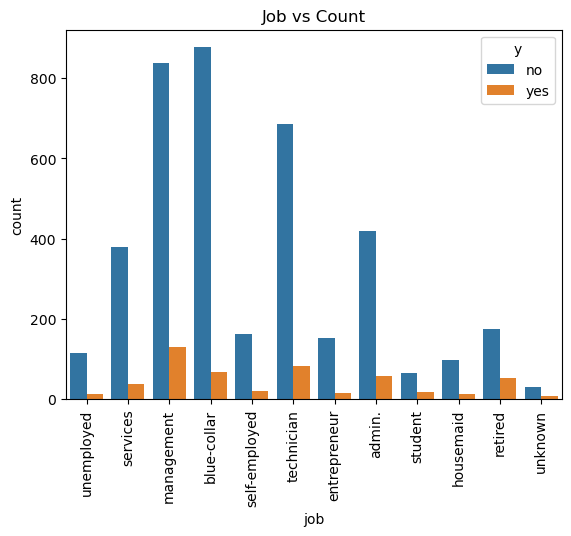

In [59]:
sns.countplot(x="job", data = train_df, hue ="y")
plt.title("Job vs Count")
plt.xticks(rotation=90)

* It seems like more number of people working in management profiles have subscribed to term deposits

Text(0.5, 1.0, 'personal loan vs Count')

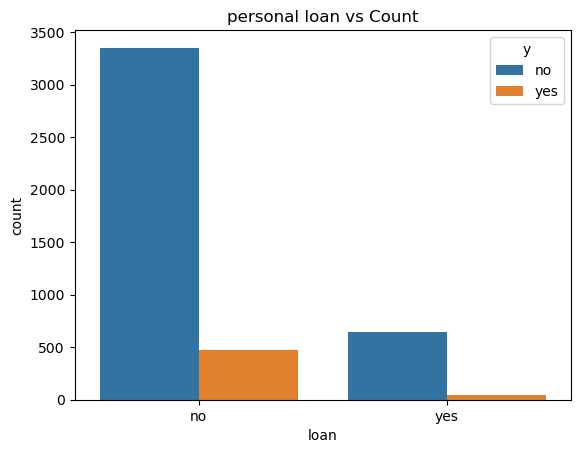

In [60]:
sns.countplot(x="loan", data = train_df, hue ="y")
plt.title("personal loan vs Count")

Text(0.5, 1.0, 'housing loan vs Count')

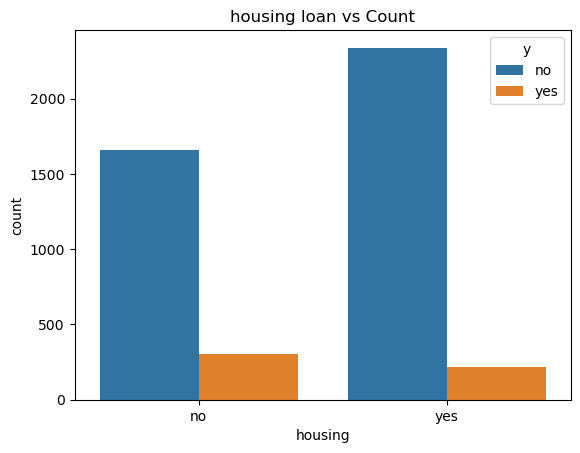

In [61]:
sns.countplot(x="housing", data = train_df, hue ="y")
plt.title("housing loan vs Count")

Text(0.5, 1.0, 'Contact vs Count')

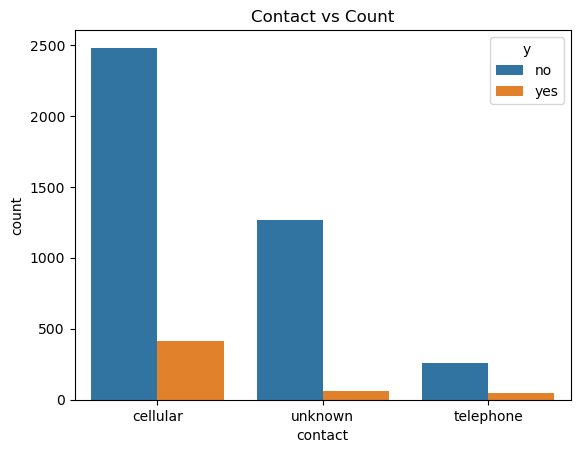

In [62]:
sns.countplot(x="contact", data = train_df, hue ="y")
plt.title("Contact vs Count")

<AxesSubplot:>

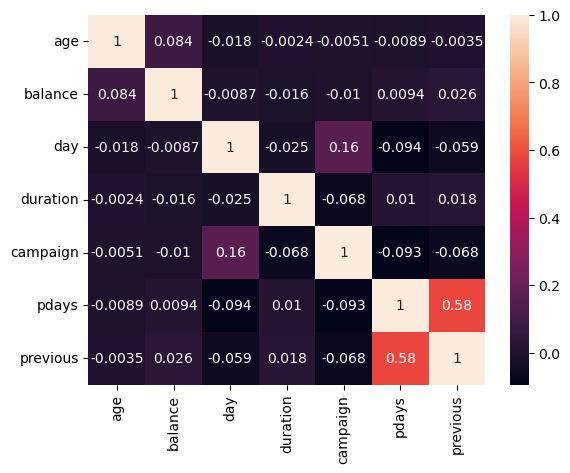

In [63]:
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot =True)

* There is no multicollinearity between independent variables

# Feature Encoding

In [64]:
#Combining training and testing data for the purpose of encoding
df = pd.concat([train_df,test_df], ignore_index=True)
df.shape

NameError: name 'test_df' is not defined

In [ ]:
df = pd.get_dummies(df,columns = ['job','marital','education','default','housing','month','loan','contact','poutcome'], drop_first = True)
df.head()

In [ ]:
df['y'].replace('yes', 1, inplace=True)
df['y'].replace('no', 0, inplace=True)
df.head()

In [67]:
target = train_df['y']
# df = df.drop('y',axis = 1)
# columns = df.columns
# scaler = MinMaxScaler()
# df = scaler.fit_transform(df)
# df = pd.DataFrame(df,columns=[columns])
# df.head()

In [68]:
y = np.array(target)
X = train_df

#Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 20)

Predicting whether the client will subscribe to Term deposit or not

In [69]:
#Initializing and fitting the logistic regression model
lr_model = LogisticRegression(max_iter=125)
lr_model.fit(X_train,y_train)
y_pred = lr_model.predict(X_test)

ValueError: could not convert string to float: 'cus892'

In [70]:
print(confusion_matrix(y_test, y_pred))

NameError: name 'y_pred' is not defined

In [71]:
print(classification_report(y_test, y_pred))

NameError: name 'y_pred' is not defined

The accuracy of the logistic regression model is 90%

Lets try with Support Vector Machine

In [72]:
clf = SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)

ValueError: could not convert string to float: 'cus892'

In [73]:
print(classification_report(y_test, y_pred_svc))

NameError: name 'y_pred_svc' is not defined

In [74]:
#Checkig for imbalances in the classes
y = np.bincount(y_train)
i = np.nonzero(y)[0]
np.vstack((i,y[i])).T

TypeError: Cannot cast array data from dtype('O') to dtype('int64') according to the rule 'safe'

The accuracy of the SVC model is 89%. But in both logistic regression and SVC, the recall value for class 1 is very less. Its due to imbalances in the classes. To overcome this issue, lets apply SMOTE technique to the training dataset.

# SMOTE for oversampling minority class

In [75]:
#Applying SMOTE on the trainingg data
sm = SMOTE(random_state = 12)
X_train_smote, y_train_smote = sm.fit_sample(X_train,y_train)

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [76]:
#Checking for imbalances in the training data
y = np.bincount(y_train_smote)
i = np.nonzero(y)[0]
np.vstack((i,y[i])).T

NameError: name 'y_train_smote' is not defined

After applyting SMOTE, the class distribution is balanced

In [ ]:
#Logistic regression on new oversampled data
lr_model = LogisticRegression(max_iter = 200)
lr_model.fit(X_train_smote,y_train_smote)
y_pred_smote = lr_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_smote))

The accuracy of the logistic regression model is 84%. And also the recall value is higher for both the classes after applying SMOTE tecnique